# **GrocerGenius : AI-Based Supermarket Sales Prediction**

**Description**:
This project aims to predict the sales of various items at different supermarket outlets using historical sales data. The dataset contains information about items, outlets, and their sales figures. The objective is to build a predictive model that can forecast the sales of an item based on various features such as item type, outlet type, and item visibility.


In [1]:
#

# DATA PREPROCESSING :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from scipy.stats import boxcox


## Load the Dataset
We begin by loading the dataset and inspecting the first few rows.


In [3]:
df = pd.read_csv('/kaggle/input/master-train/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Summary

Initial exploration of the dataset helps us understand the structure of the data, its dimensions, and any missing values.

Let's display the dataset and check for missing values:


In [4]:
print(df.shape)  # Data shape
df.isnull().sum()  # Check missing values

(8523, 12)


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Observations**:
- The dataset contains 8523 rows and 12 columns.
- There are missing values in `Item_Weight` and `Outlet_Size`.

## Handling Missing Values

We will:
- Fill missing `Item_Weight` values by the median weight within each `Item_Type`.
- Fill missing `Outlet_Size` using the mode based on `Outlet_Type`.


In [5]:
# Impute missing Item_Weight
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

# Impute missing Outlet_Size
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verify no missing values
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Saving the Cleaned Data

In [6]:
# Saved the cleaned data to a CSV file in the Kaggle notebook environment
cleaned_data_path = '/kaggle/working/cleaned_train.csv'
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved at {cleaned_data_path}")


Cleaned dataset saved at /kaggle/working/cleaned_train.csv


# EXPLORATORY DATA ANALYSIS :

We now explore the data to find patterns and relationships between different features and the target variable, `Item_Outlet_Sales`.



## Loading the Saved Data for EDA

In [7]:
# Load the saved data for EDA
df_cleaned = pd.read_csv('/kaggle/working/cleaned_train.csv')

# Display the first few rows of the cleaned data
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Correlation Heatmap
We start by checking the correlation between numerical features.

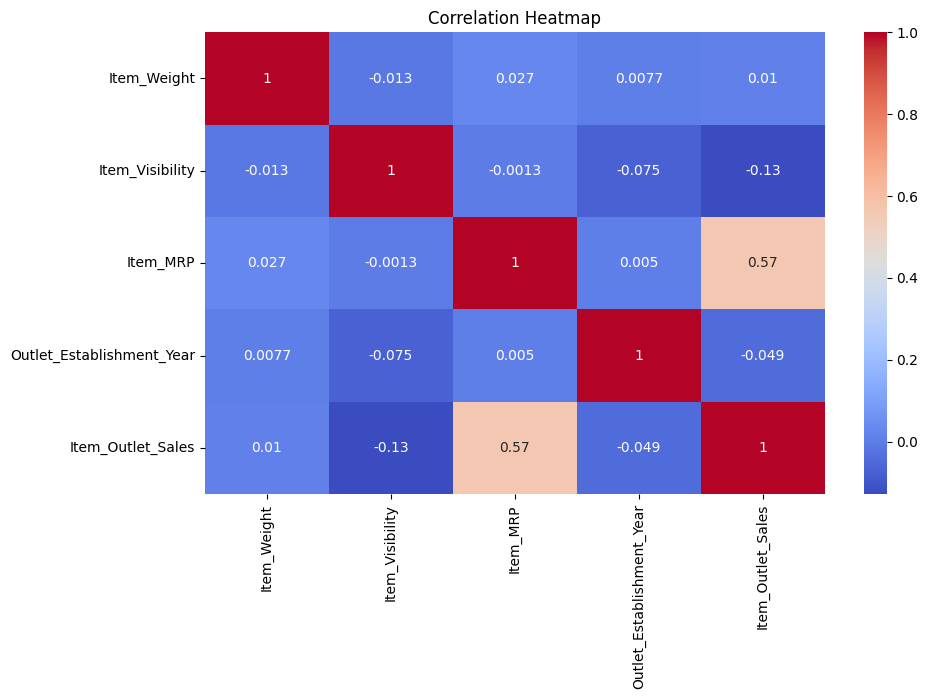

In [8]:
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations**:
- Item_MRP has a moderate positive correlation with `Item_Outlet_Sales`.
- Other features like `Item_Weight` and `Item_Visibility` have weaker correlations.


## Visualizing Data

We now create visualizations to explore the distribution of numerical features and the relationships between categorical features and the target variable `Item_Outlet_Sales`.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


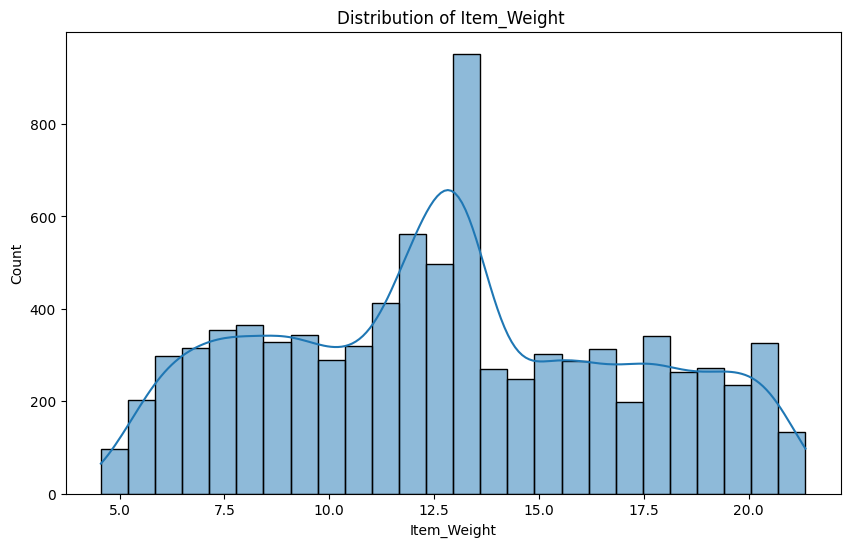

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


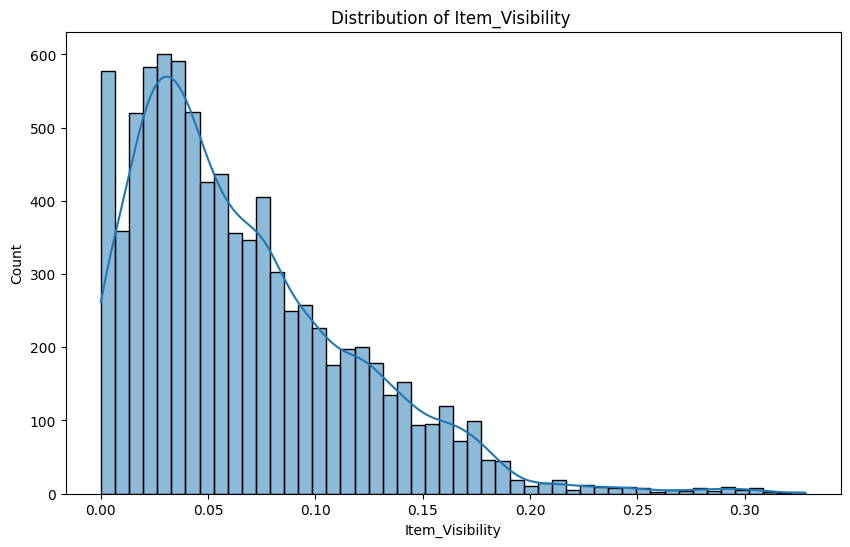

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


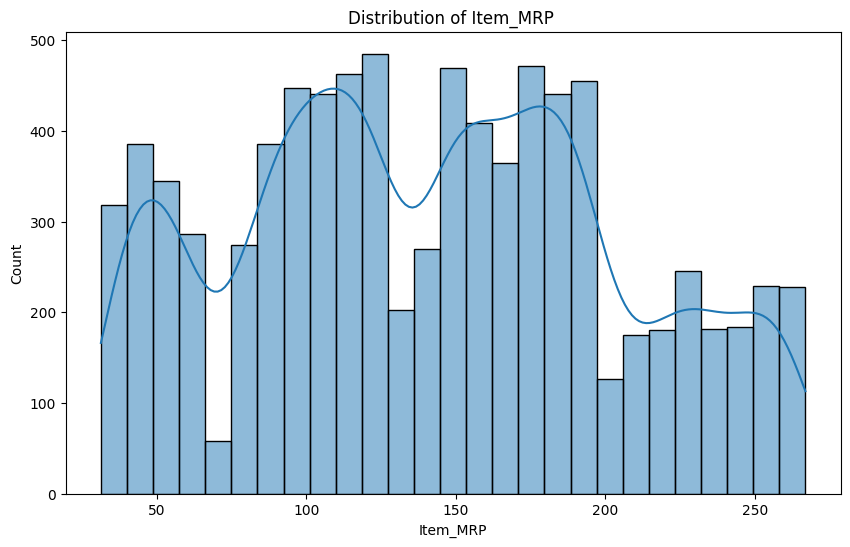

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


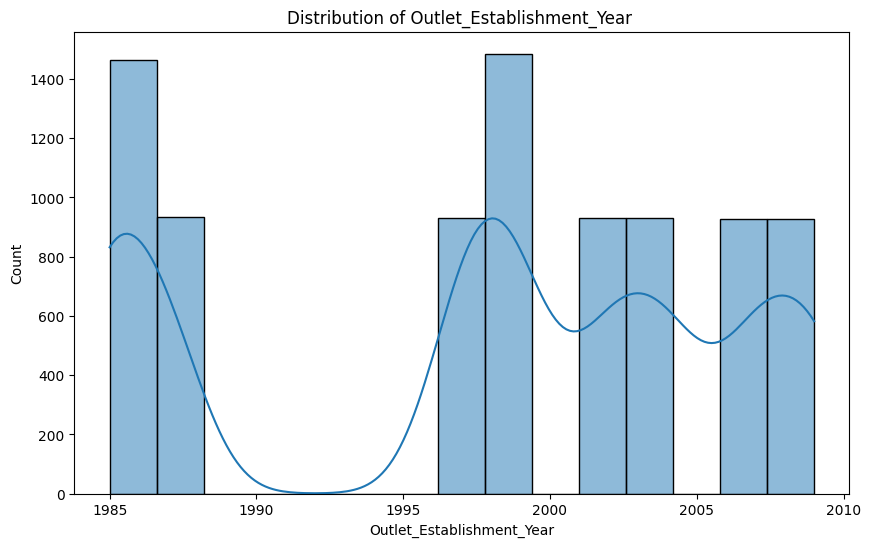

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


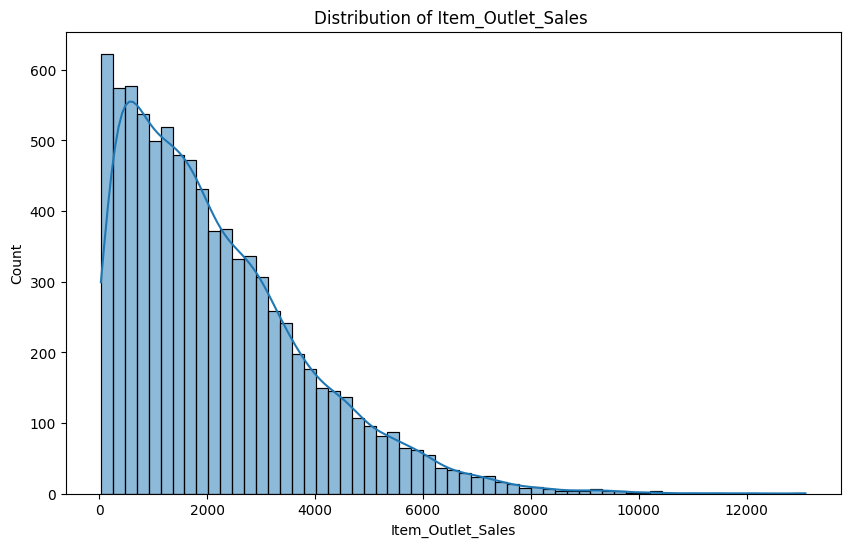

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sorted_data = df[col].sort_values()  # Sort the data
    sns.histplot(sorted_data, kde=True)
    plt.title(f'Distribution of {col} ')
    plt.show()


**Observations**:
* Item_Outlet_Sales is right-skewed, with a concentration of lower sales values.
* Item_Visibility shows a large number of near-zero values, with a few outliers at higher values.

## Handling Zero Visibility
Items with zero visibility were replaced with the median visibility value:

In [10]:
median_visibility = df[df['Item_Visibility'] > 0]['Item_Visibility'].median()
df['Item_Visibility'] = df['Item_Visibility'].replace(0, median_visibility)
print(f"Number of zero visibility values after replacement: {sum(df['Item_Visibility'] == 0)}")


Number of zero visibility values after replacement: 0


## Count Plots for Categorical Features
We visualize categorical features to understand their distribution.

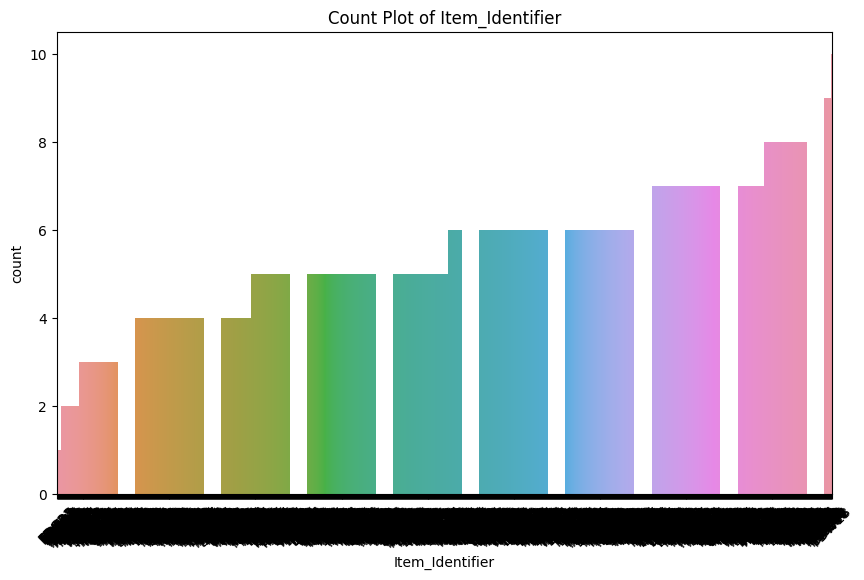

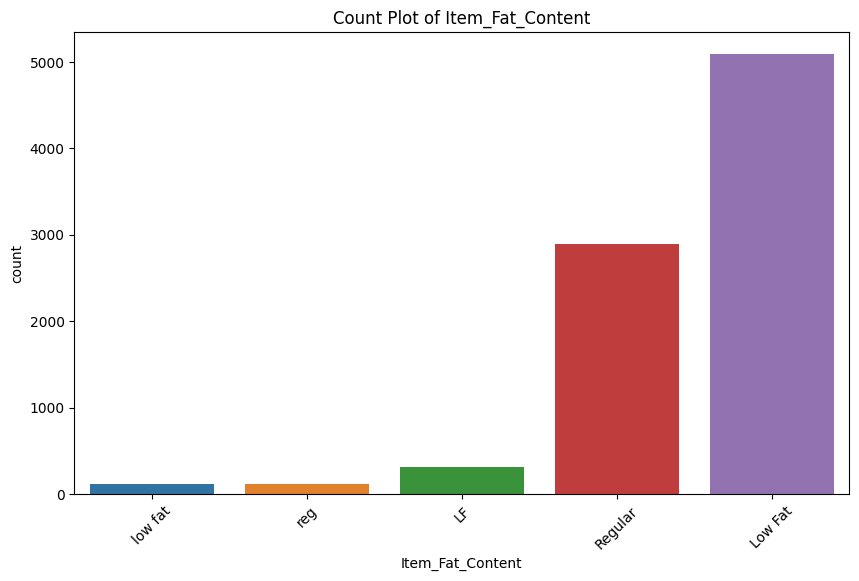

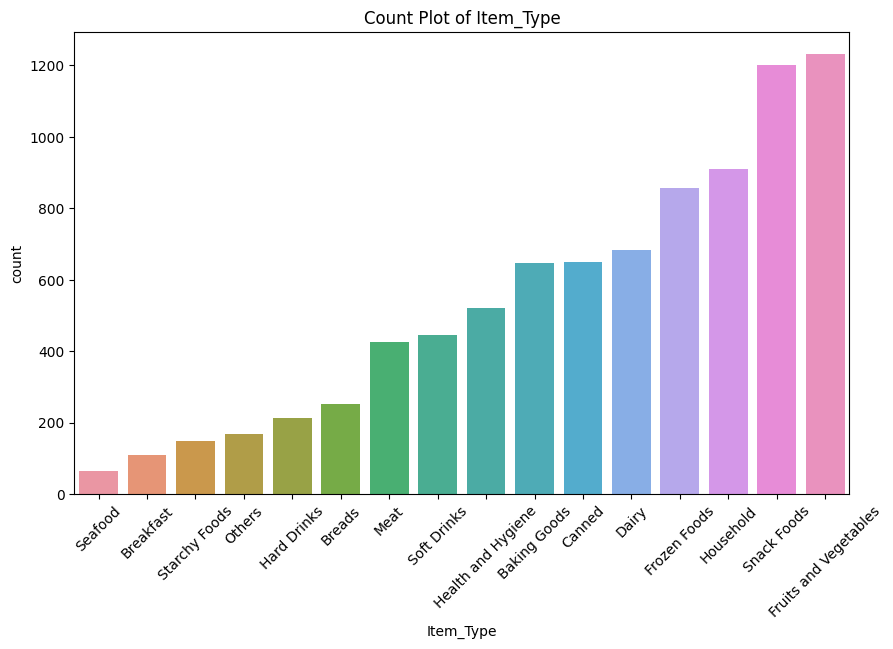

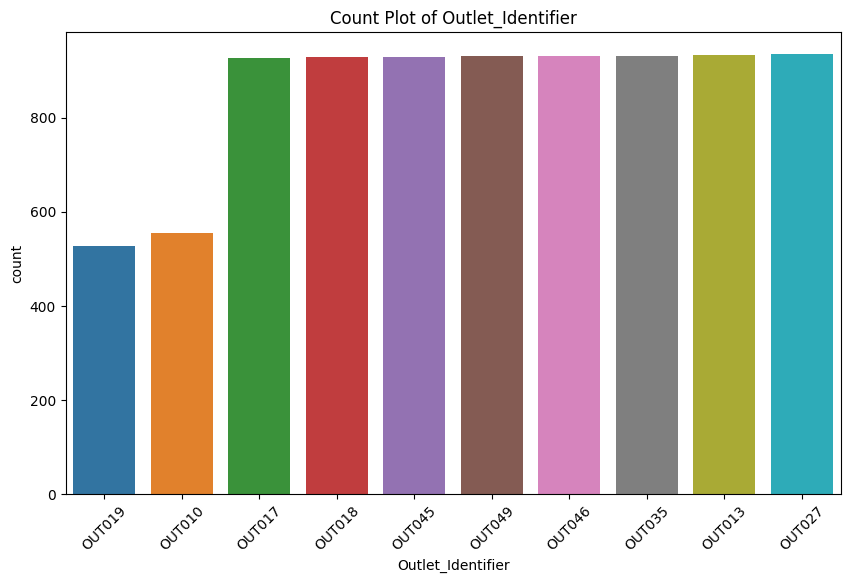

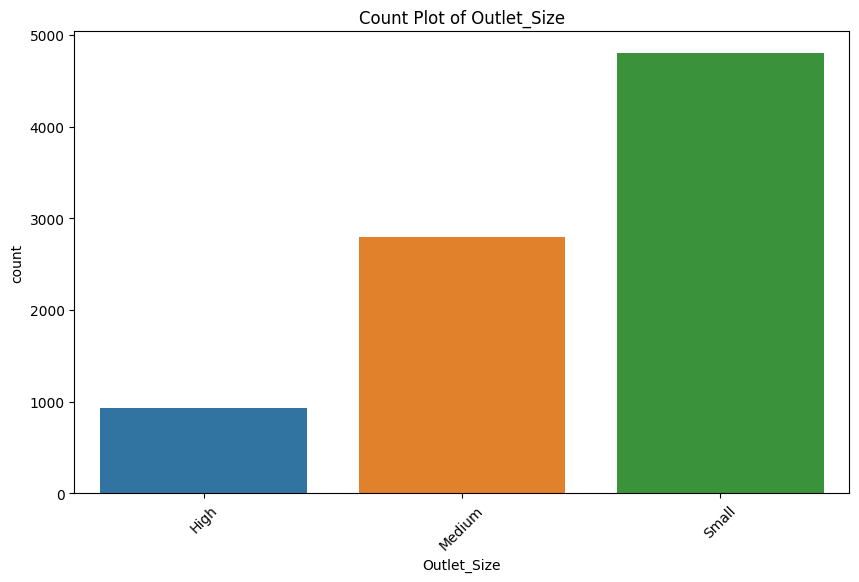

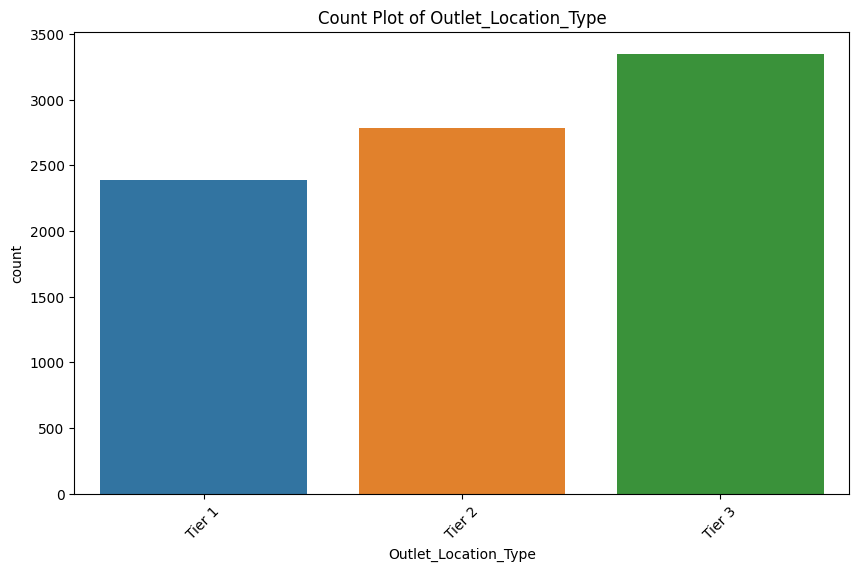

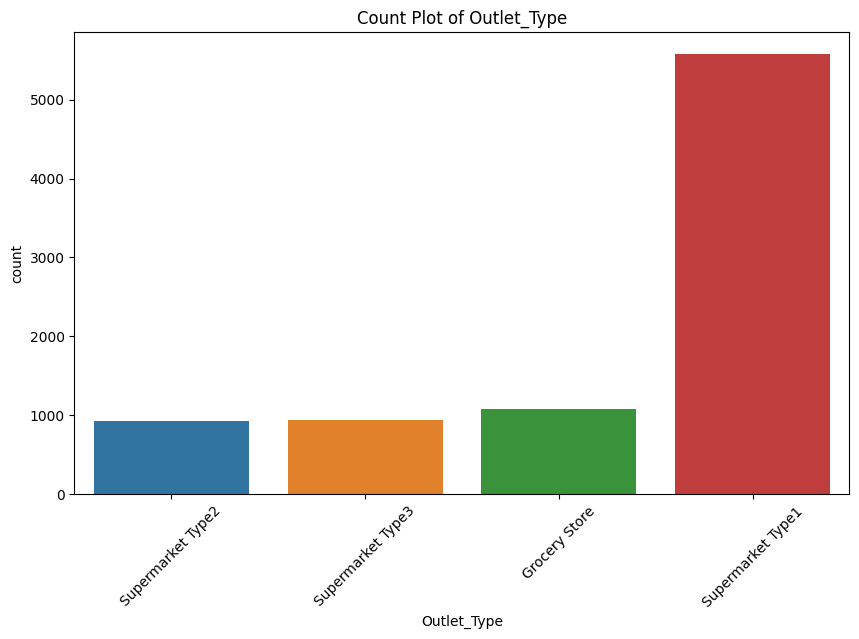

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sorted_data = df[col].value_counts().sort_values().index  # Sort categories by count
    sns.countplot(x=col, data=df, order=sorted_data)  # Use sorted data for plotting
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


**Observations**:
* Outlet_Type: Supermarket Type1 is the most common outlet type in the dataset.
* Item_Fat_Content: There are some inconsistent values (e.g., Low Fat and LF), which might need further cleaning.

## Check Unique Values in Item_Fat_Content:

In [12]:
# Check for unique values in Item_Fat_Content
unique_values = df['Item_Fat_Content'].unique()
print("Unique values in Item_Fat_Content:", unique_values)


Unique values in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


## Standardizing Fat Content Values
To ensure consistency, we map various values to a common category.

In [13]:
fat_content_mapping = {
    'low fat': 'low fat',
    'low fat': 'low fat',  # keep the same
    'lf': 'low fat',       # map 'LF' to 'low fat'
    'low fat': 'low fat',  # again for consistency
    'regular': 'regular',
    'reg': 'regular',      # map 'reg' to 'regular'
}

# Apply the mapping
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower().str.strip().replace(fat_content_mapping)

# Check for unique values after mapping
unique_values = df['Item_Fat_Content'].unique()
print("Unique values in Item_Fat_Content after mapping:", unique_values)

# Check for unique values and their counts in Item_Fat_Content
value_counts = df['Item_Fat_Content'].value_counts()
print("Value counts in Item_Fat_Content after mapping:\n", value_counts)

Unique values in Item_Fat_Content after mapping: ['low fat' 'regular']
Value counts in Item_Fat_Content after mapping:
 Item_Fat_Content
low fat    5517
regular    3006
Name: count, dtype: int64


## Box Plots Grouped by Categorical Feature

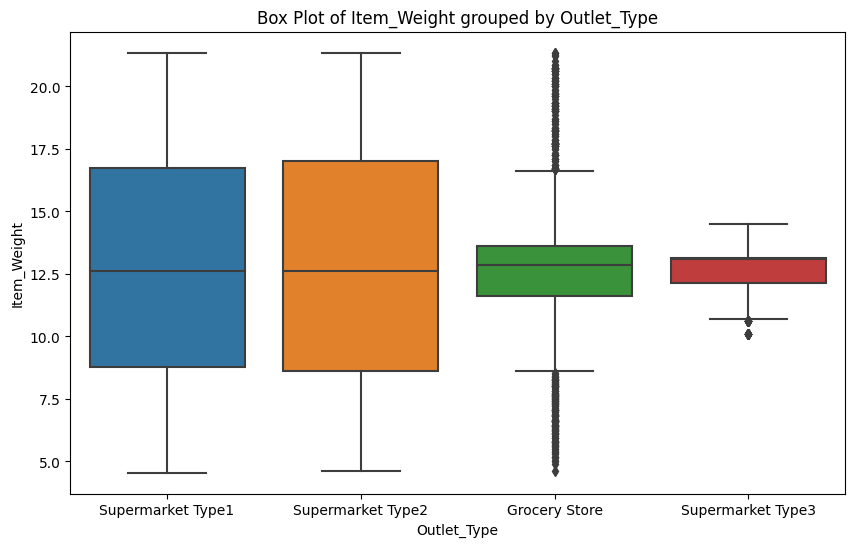

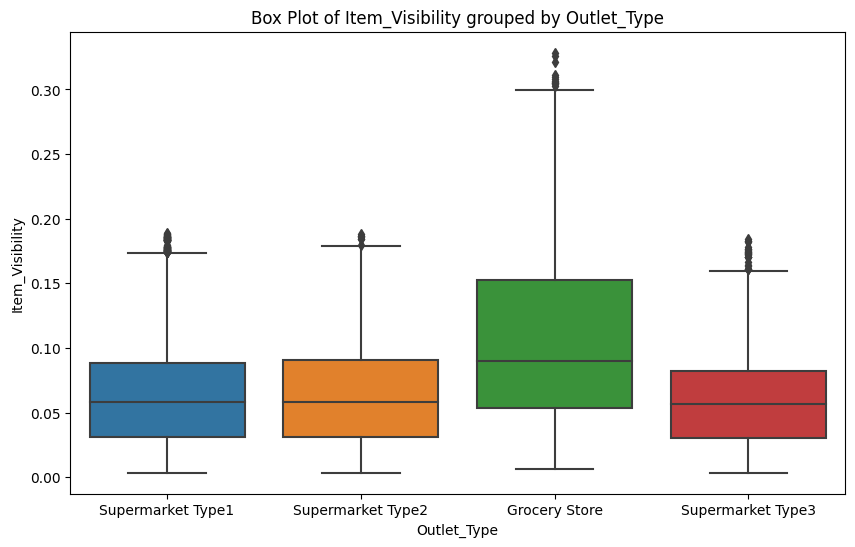

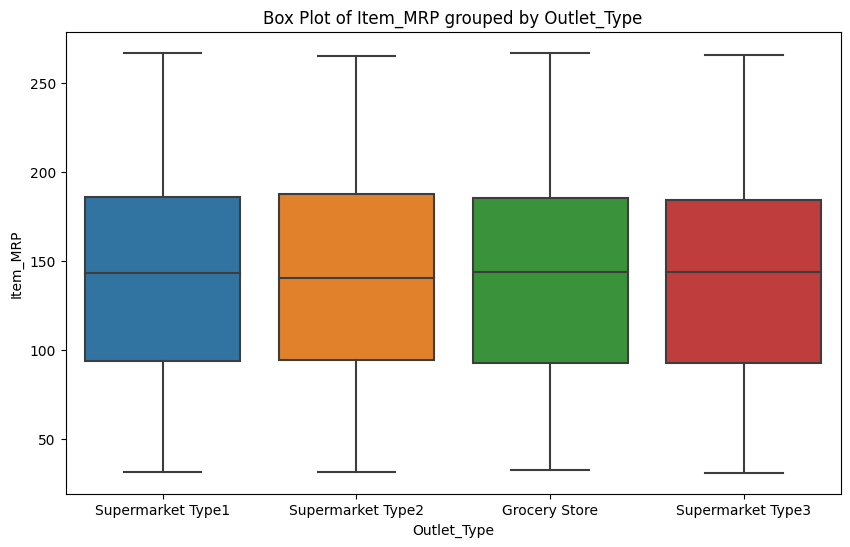

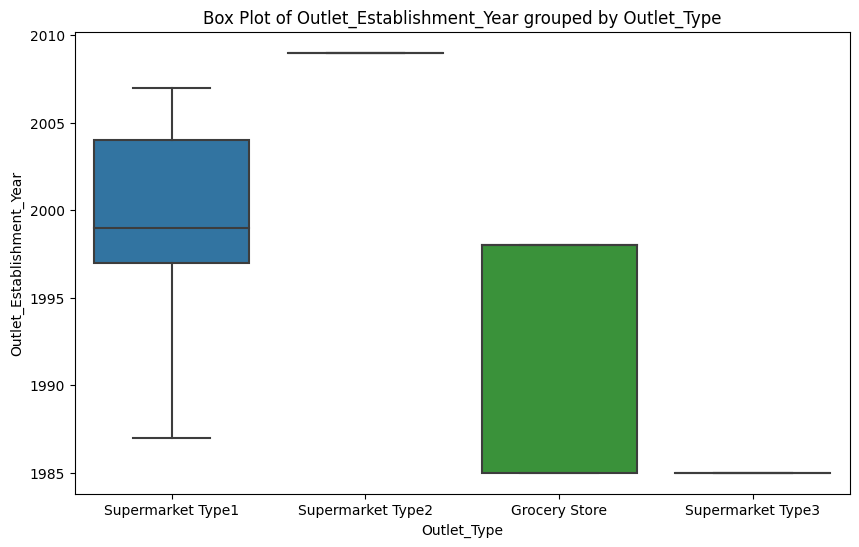

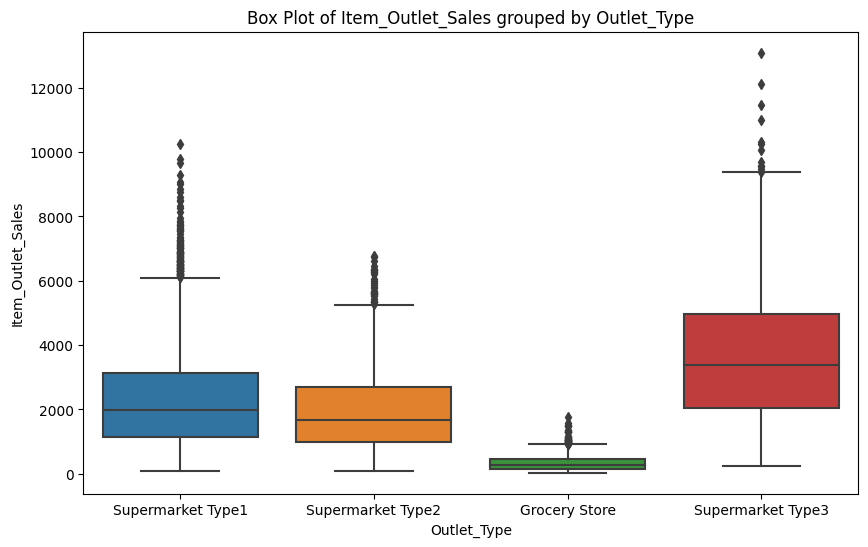

In [14]:
if 'Outlet_Type' in df.columns:
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Outlet_Type', y=col, data=df)
        plt.title(f'Box Plot of {col} grouped by Outlet_Type')
        plt.show()

**Observations**:
* Supermarket Type1 outlets generally have higher Item_Outlet_Sales compared to other outlet types.
* The variation in sales within different outlet types is quite large, especially for Supermarket Type1.

## Outlier Detection
We will use the Interquartile Range (IQR) method to detect outliers in continuous numerical features. Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where:

* Q1 is the first quartile (25th percentile).
* Q3 is the third quartile (75th percentile).
* IQR is the interquartile range, calculated as Q3 - Q1.

In [15]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Checking for outliers in numerical columns
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
outliers = {}

for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(df, col)
    print(f"Outliers detected in {col}: {len(outliers[col])}")


Outliers detected in Item_Weight: 0
Outliers detected in Item_Visibility: 173
Outliers detected in Item_MRP: 0
Outliers detected in Item_Outlet_Sales: 186


## Outlier Mitigation Strategy
We will use capping to mitigate the outliers. This involves replacing the outliers with the values at the lower and upper bounds defined by the IQR method. Capping prevents removing data points and maintains the size of the dataset.

**Function to Cap Outliers**:

In [16]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Capping outliers for the numerical columns
for col in numerical_cols:
    cap_outliers(df, col)


In [17]:
# Checking if outliers are mitigated
for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(df, col)
    print(f"Outliers remaining in {col} after capping: {len(outliers[col])}")


Outliers remaining in Item_Weight after capping: 0
Outliers remaining in Item_Visibility after capping: 0
Outliers remaining in Item_MRP after capping: 0
Outliers remaining in Item_Outlet_Sales after capping: 0


**Observations**:
* After capping, all the outliers have been effectively mitigated in Item_Weight, Item_Visibility, and Item_Outlet_Sales.
* Item_MRP had no outliers to begin with, so no changes were made to this feature.

## Feature Derivation
We can add a new feature, Outlet_Age, to capture how old each outlet is.

In [18]:
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']


## Feature Encoding
Description:
Feature encoding was performed on both nominal and ordinal features in the dataset. This converts categorical values into numerical labels, making the data compatible with machine learning models.


In [19]:
# 1. Target Encoding for Item_Type
item_type_encoder = ce.TargetEncoder(cols=['Item_Type'])
df['Item_Type'] = item_type_encoder.fit_transform(df['Item_Type'], df['Item_Outlet_Sales'])

# 2. Frequency Encoding for Outlet_Identifier
frequency = df['Outlet_Identifier'].value_counts()
df['Outlet_Identifier'] = df['Outlet_Identifier'].map(frequency)

# 3. One-Hot Encoding for Outlet_Type
df = pd.get_dummies(df, columns=['Outlet_Type'], drop_first=True)

# The resulting DataFrame
print("Resulting DataFrame after Encoding:")
print(df.head())


Resulting DataFrame after Encoding:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          low fat         0.016047  2181.264770   
1           DRC01         5.92          regular         0.019278  1976.461712   
2           FDN15        17.50          low fat         0.016760  2137.242282   
3           FDX07        19.20          regular         0.057792  2253.487378   
4           NCD19         8.93          low fat         0.057792  2234.782576   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092                930                       1999      Medium   
1   48.2692                928                       2009      Medium   
2  141.6180                930                       1999      Medium   
3  182.0950                555                       1998       Small   
4   53.8614                932                       1987        High   

  Outlet_Location_Type  Item_Outlet_Sa

**Observations**
* Item_Type Encoding: The Item_Type feature has been effectively transformed to numeric values, allowing the model to utilize this feature more effectively.
* Outlet_Identifier Frequency: The frequency encoding of Outlet_Identifier now reflects the counts of each identifier, which could help in understanding the influence of the outlet identifiers on sales.
* One-Hot Encoded Outlet_Type: The one-hot encoding for Outlet_Type has resulted in three new binary columns. This allows for better representation of the Outlet_Type without implying any order among them.
* Feature Types: The DataFrame now consists of a mix of numerical and categorical features, with categorical variables converted to numeric formats, enhancing the readiness of the DataFrame for machine learning models.
* Overall Structure: The structure of the DataFrame remains consistent, making it easy to analyze and visualize. The features are now more suitable for model training.

In [20]:
ordinal_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
encoder = OrdinalEncoder(categories=[
    ['low fat', 'regular'],              
    ['Small', 'Medium', 'High'],         
    ['Tier 3', 'Tier 2', 'Tier 1']  # Reversed order
], handle_unknown='use_encoded_value', unknown_value=-1)

# Transform the ordinal features
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

# Print the transformed DataFrame
print(df)

     Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300               0.0         0.016047   
1              DRC01        5.920               1.0         0.019278   
2              FDN15       17.500               0.0         0.016760   
3              FDX07       19.200               1.0         0.057792   
4              NCD19        8.930               0.0         0.057792   
...              ...          ...               ...              ...   
8518           FDF22        6.865               0.0         0.056783   
8519           FDS36        8.380               1.0         0.046982   
8520           NCJ29       10.600               0.0         0.035186   
8521           FDN46        7.210               1.0         0.145221   
8522           DRG01       14.800               0.0         0.044878   

        Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0     2181.264770  249.8092                930            

**Observations**
Encoded Values:

The Item_Fat_Content feature has been encoded with:
0.0 for 'low fat'
1.0 for 'regular'
Outlet_Size Encoding:

The Outlet_Size feature has been encoded with:
0.0 for 'Small'
1.0 for 'Medium'
2.0 for 'High'
Outlet_Location_Type Encoding:

The Outlet_Location_Type feature has been encoded based on the reversed order:
0.0 for 'Tier 3'
1.0 for 'Tier 2'
2.0 for 'Tier 1'

* Unknown categories have been encoded as -1.0.

* Model Readiness: The encoded features are now in a format that is compatible with machine learning algorithms, making the dataset more suitable for further analysis and model training.

* Remaining Features: Other features, including Item_Identifier, Item_Weight, Item_Visibility, Item_Type, and various outlet-related features, remain unchanged and continue to provide valuable information.

## Standardization
Description: This method ensures that the features have a mean of 0 and a standard deviation of 1, making them compatible with algorithms sensitive to feature scales.

In [21]:
scaler = StandardScaler()
df[['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(df[['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])


Applied StandardScaler to the continuous features.

In [22]:
print(df)

     Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300               0.0        -1.156923   
1              DRC01        5.920               1.0        -1.085939   
2              FDN15       17.500               0.0        -1.141263   
3              FDX07       19.200               1.0        -0.239783   
4              NCD19        8.930               0.0        -0.239783   
...              ...          ...               ...              ...   
8518           FDF22        6.865               0.0        -0.261949   
8519           FDS36        8.380               1.0        -0.477277   
8520           NCJ29       10.600               0.0        -0.736439   
8521           FDN46        7.210               1.0         1.681020   
8522           DRG01       14.800               0.0        -0.523505   

        Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0     2181.264770  1.747454                930            

**Observations**

Standardized Values: The values for Item_Visibility, Item_MRP, and Item_Outlet_Sales have been transformed to a standard scale, with most values falling between -1 and 1.

## Target Variable Transformation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


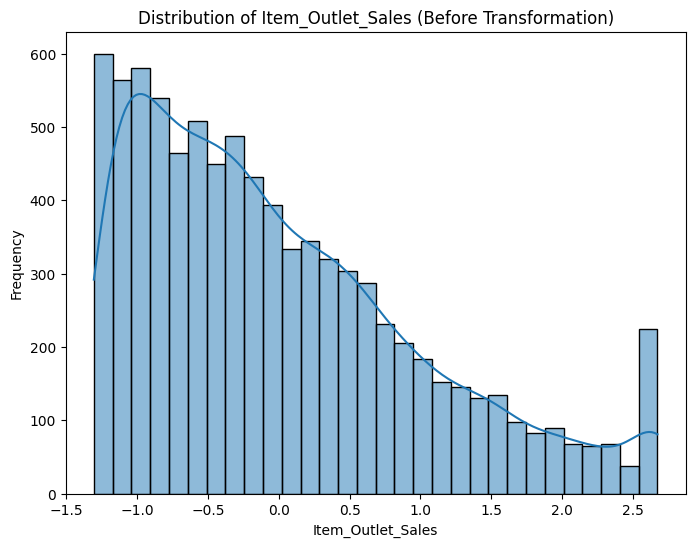

In [23]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title("Distribution of Item_Outlet_Sales (Before Transformation)")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()


**Observation**:
Before transformation, the target variable (Item_Outlet_Sales) is right-skewed, indicating that a transformation is required to make it more normally distributed.

## Box-Cox Transformation on Item_Outlet_Sales

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


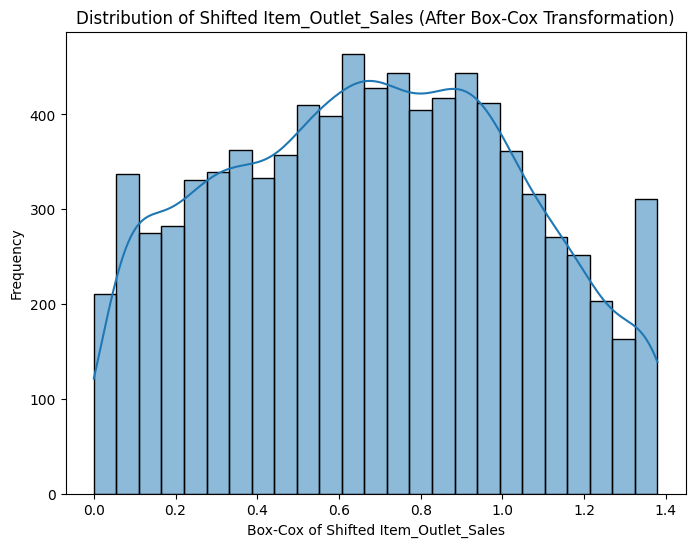

,Item_Outlet_Sales,Item_Outlet_Sales_Shifted,Item_Outlet_Sales_BoxCox
0,0.971723,3.278386,1.060332
1,-1.054237,1.252425,0.220231
2,-0.036339,2.270323,0.757941
3,-0.876392,1.430271,0.345705
4,-0.714938,1.591725,0.444445


In [24]:
# Shift the data by adding a constant (for negative values)
min_value = abs(df['Item_Outlet_Sales'].min()) + 1
df['Item_Outlet_Sales_Shifted'] = df['Item_Outlet_Sales'] + min_value

# Apply Box-Cox transformation
df['Item_Outlet_Sales_BoxCox'], _ = boxcox(df['Item_Outlet_Sales_Shifted'])

# Plot the distribution after Box-Cox transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['Item_Outlet_Sales_BoxCox'], kde=True)
plt.title("Distribution of Shifted Item_Outlet_Sales (After Box-Cox Transformation)")
plt.xlabel("Box-Cox of Shifted Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()

# Display transformed data
df[['Item_Outlet_Sales', 'Item_Outlet_Sales_Shifted', 'Item_Outlet_Sales_BoxCox']].head()


The Box-Cox transformation, combined with the necessary data shifting, has made the data more normally distributed. This preprocessing step is particularly useful for improving model accuracy in statistical and machine learning applications.